## About Dataset

### Context
The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)

### Content
This dataset contains over 8600 rows of data, on each row is a person’s:

- Type (This persons 4 letter MBTI code/type)
- A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

### Importing necessary Libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
# from imblearn.over_sampling import SMOTE
import plotly.express as px
import warnings

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

C:\Users\saahithya\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
#loading dataset
data_set = pd.read_csv("mbti_1.csv")
data_set.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

# EDA

In [3]:
# checking for nulls
data_set.isnull().sum()

type     0
posts    0
dtype: int64

In [4]:
nRow, nCol = data_set.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8675 rows and 2 columns


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


- There are only 2 columns in the dataset
- Total no. of rows are 8675
- There are no null values present in the dataset
- Disadvantage: all values are textual, hence they have to be converted to numerical form to train the ML model

In [6]:
data_set.describe(include=['object'])

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

- There are 16 unique personality type indicators in the dataset
- INFP is the most frequently occuring personality type in our dataset (no. of occurences is 1832)
- There are no repeating posts in the dataset

Finding the unique values from the 'type' of personality column

In [7]:
types = np.unique(np.array(data_set['type']))

In [8]:
total = data_set.groupby(['type']).count()
total
# total.sum().sum()

posts
type       
ENFJ    190
ENFP    675
ENTJ    231
ENTP    685
ESFJ     42
ESFP     48
ESTJ     39
ESTP     89
INFJ   1470
INFP   1832
INTJ   1091
INTP   1304
ISFJ    166
ISFP    271
ISTJ    205
ISTP    337

Data visualization for no. of posts for each personality type

Text(0.5, 1.0, 'Total posts for each personality type')

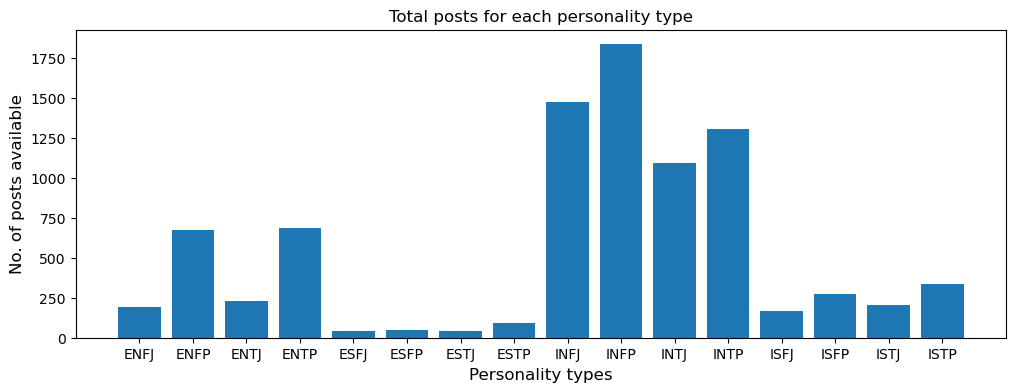

In [9]:
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('No. of posts available', size = 12)
plt.title('Total posts for each personality type')

The dataset is clearly unbalanced throughout the different classes. We observe that some of the personality types has a lot more data than others, the most common users personality is INFP (Introvert Intuition Feeling Perceiving).

However, we reach this conclusion based on user comments: we can consider for now that users who comment on social media more frequently are more intoverted, perceptive, and emotional.

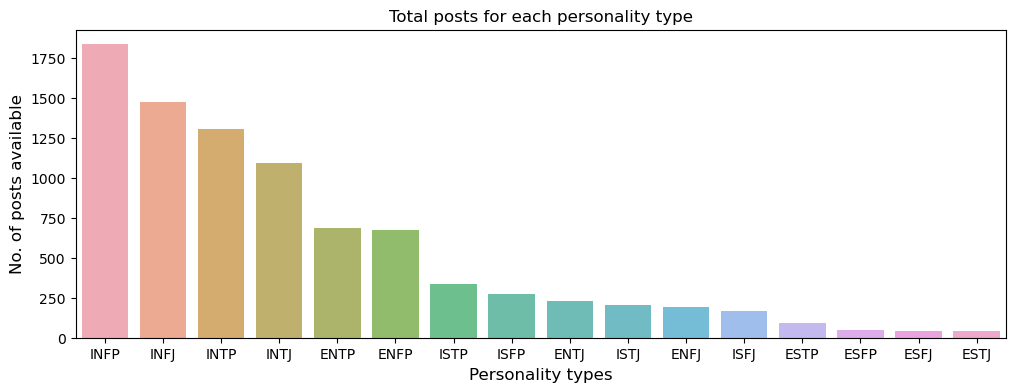

In [10]:
#Plotting this in descending order for better understanding of this visualization
cnt_srs = data_set['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)  
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts available', fontsize=12)
plt.title('Total posts for each personality type')
plt.show()

<Axes: xlabel='type', ylabel='words_per_comment'>

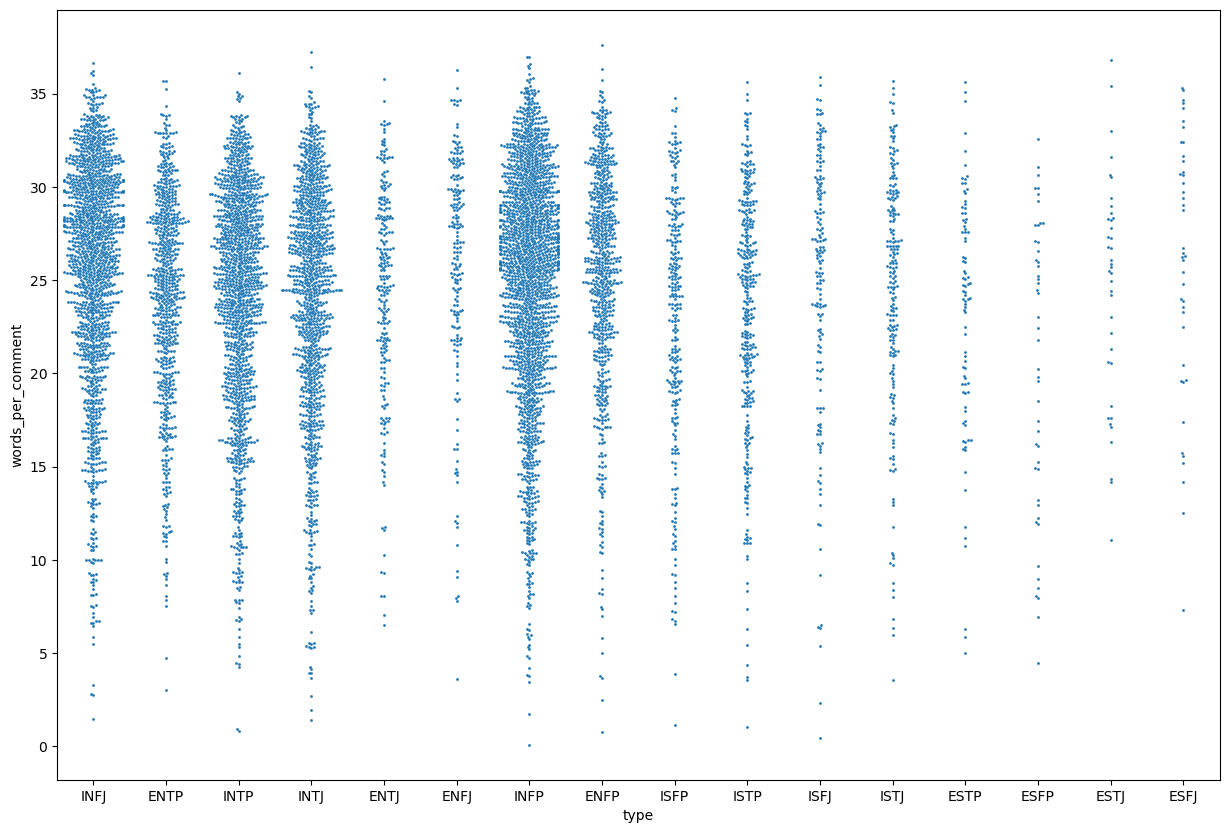

In [11]:
df = data_set.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="words_per_comment", data=df,size=2)

This plot further shows clearly that there are a no. of imbalances in our dataset, showing all the observations along with some representation of the underlying distribution using our added features.

INFP has the most cluttered showing there are most no. of comments of this type of personality

**The above lines add two new columns to the DataFrame:**

- words_per_comment: This column calculates the average number of words per post for each user.

- variance_of_word_counts: This column calculates the variance of word counts across all posts for each user.

<Figure size 500x400 with 0 Axes>

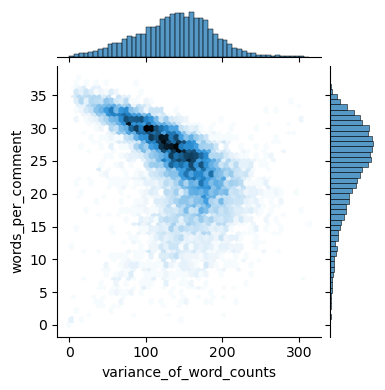

In [12]:
plt.figure(figsize=(5,4))
sns.jointplot(x="variance_of_word_counts", y="words_per_comment", data=df, kind="hex",height=4) 
# 21BCE2478

<Figure size 500x400 with 0 Axes>

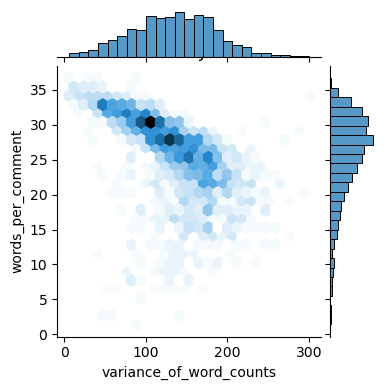

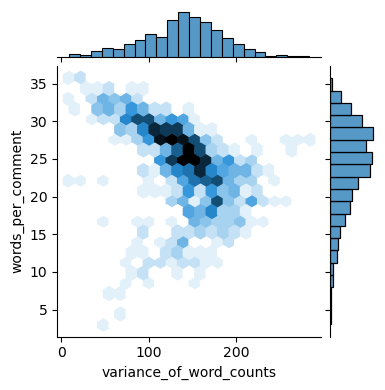

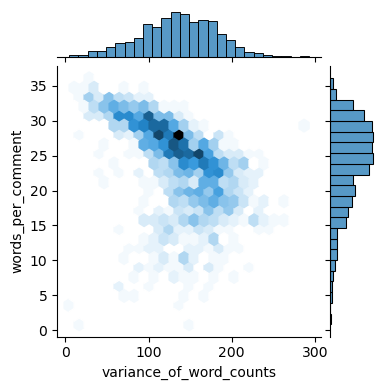

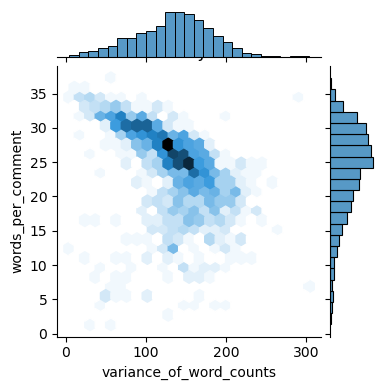

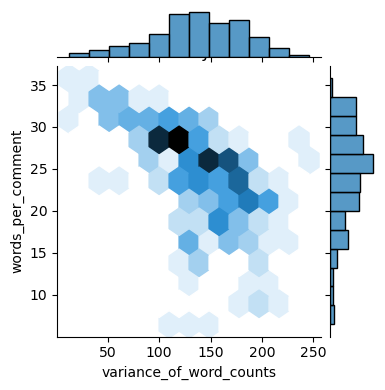

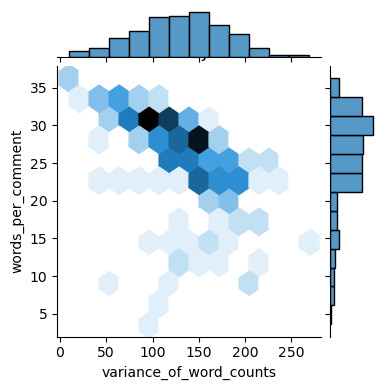

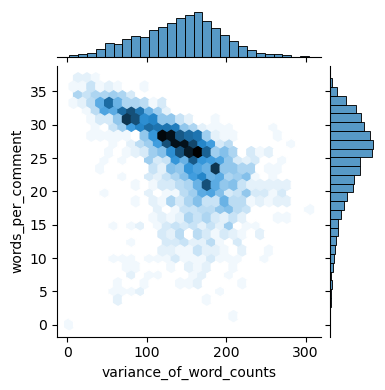

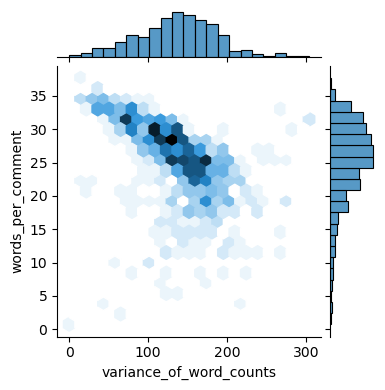

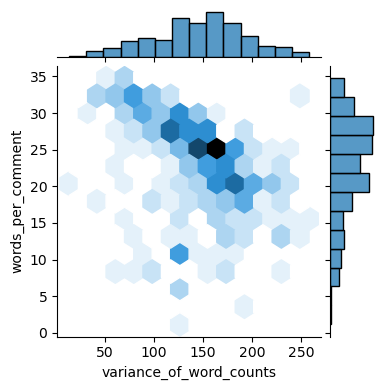

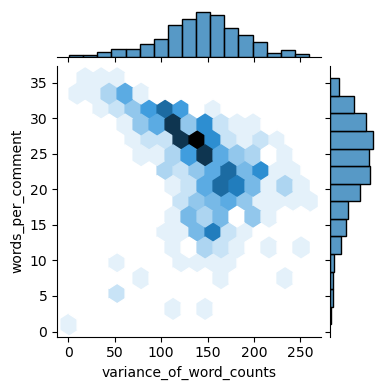

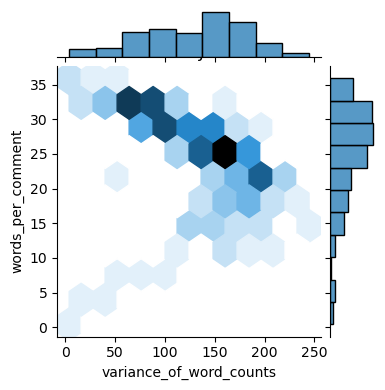

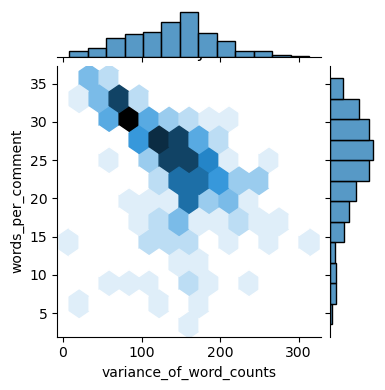

In [13]:
def plot_jointplot(mbti_type, axs, titles):
    df_1 = df[df['type'] == mbti_type]
    sns.jointplot(x="variance_of_word_counts", y="words_per_comment", data=df_1, kind="hex", ax = axs, title = titles, height=4)

plt.figure(figsize=(5, 4))    
i = df['type'].unique()
k = 0

for m in range(1,3):
  for n in range(1,7):
    df_1 = df[df['type'] == i[k]]
    sns.jointplot(x="variance_of_word_counts", y="words_per_comment", data=df_1, kind="hex", height=4 )
    plt.title(i[k])
    k+=1
plt.show()

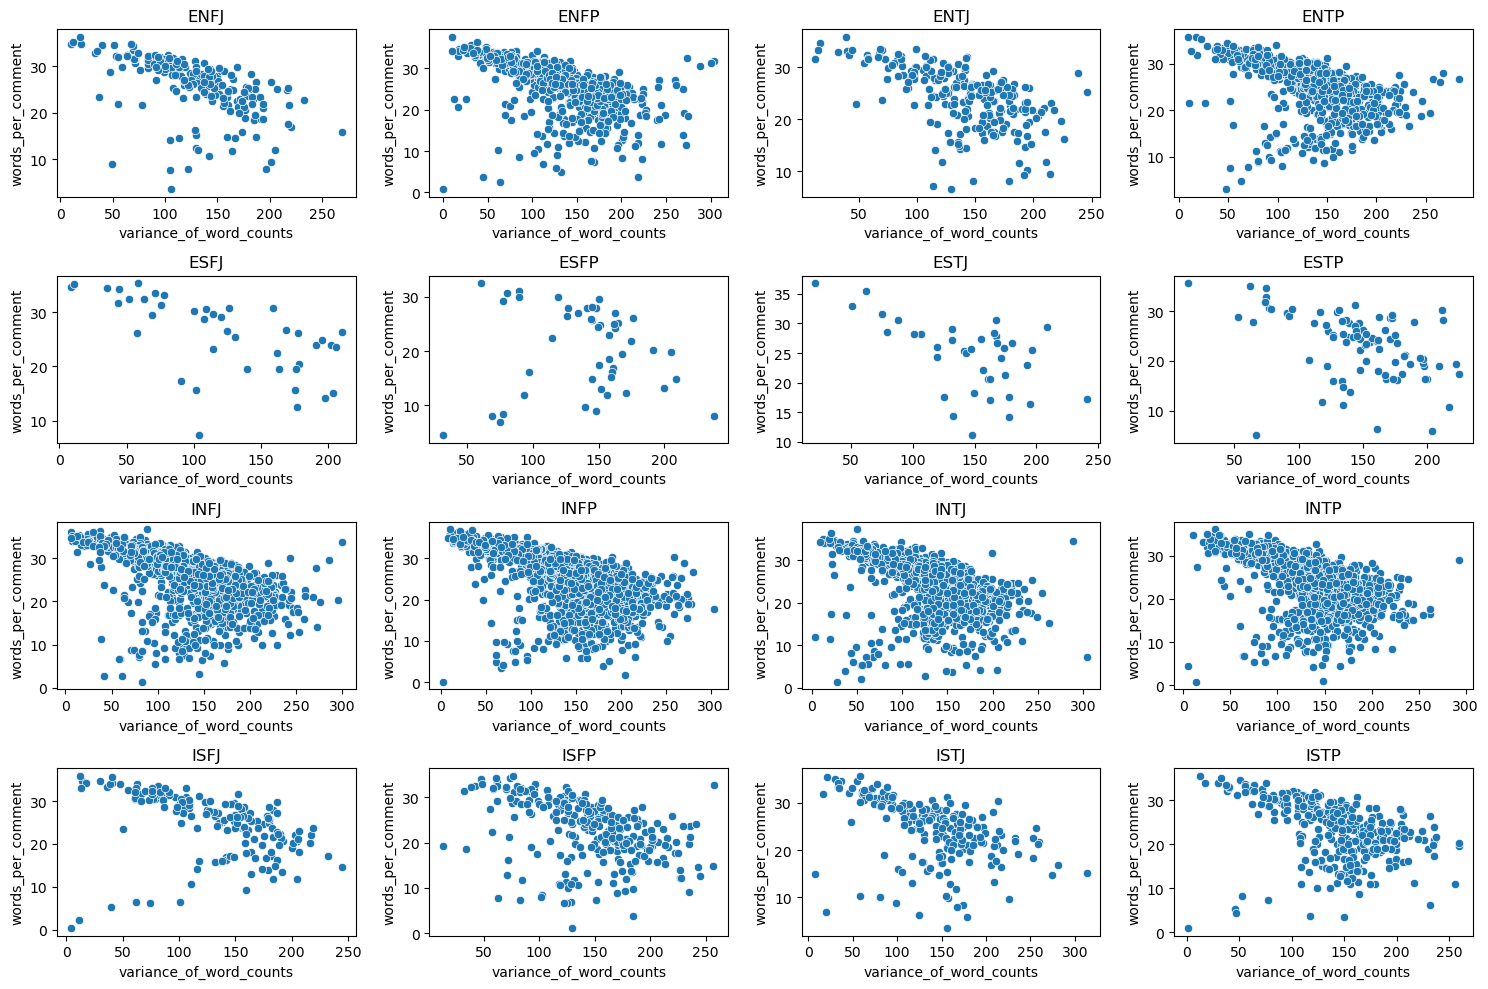

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Loop through each type and plot scatterplot
for i, (type_, group) in enumerate(df.groupby('type')):
    sns.scatterplot(x='variance_of_word_counts', y='words_per_comment', data=group, ax=axes[i])
    axes[i].set_title(f'{type_}')

plt.tight_layout()


For all the plots you can see that most of the posts have words btw 100-150 and most of no. of words per comment by a user is nearly 25 to 30 range.
Exception to this case is for the plots for ISPJ and ISTJ, but this maybe due to the fact that there are significantly less no. of posts available for these personality types (further shown by the bar plots below)

We can see that there is no correlation observed between variance of word count and the words per comment.

No useful inferences can be made by analyzing the individual jointplots as the total no of posts for each personlaity type is different.

**Hence, these features will not be useful in building our Personality prediction model.**

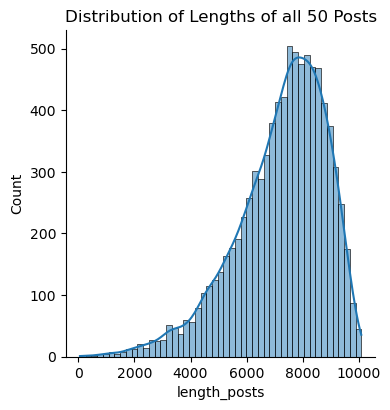

In [15]:
df["length_posts"] = df["posts"].apply(len)
sns.displot(df["length_posts"],kde=True, height=4).set(title="Distribution of Lengths of all 50 Posts")


Most no of lengthly posts have between 7000-9000 words.

**kde**: line that represents the kernel density estimation. It is a fundamental data smoothing problem where inferences about the population, based on a finite data sample. This kernel density estimate is a function defined as the sum of a kernel function on every data point.

In [16]:
df.to_csv("length.csv",index=False)

In [17]:
#Finding the most common words in all posts.
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y] # flattens list of lists; basically list of all unique words
Counter(words).most_common(20)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496)]

The posts majorly contain general words like : I, I'm, so, me, or, if, and, can etc. It is safe to assume that these words won't really provide any useful information to train the ML model as most of them are **stop-words, stem-words, or other useless words.**

In [18]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))
print("5 posts from start are:")
posts[0:5]

Number of users 8675
Number of posts 422845
5 posts from start are:


[('INFJ', "'http://www.youtube.com/watch?v=qsXHcwe3krw"),
 ('INFJ', 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg'),
 ('INFJ',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks'),
 ('INFJ', 'What has been the most life-changing experience in your life?'),
 ('INFJ',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.')]

It is inferenced that a lot of **hyperlinks** are present in these posts
It is safe to assume that url links do not provide any real information about a user's personality, hence, we need to clean our dataset for these too.

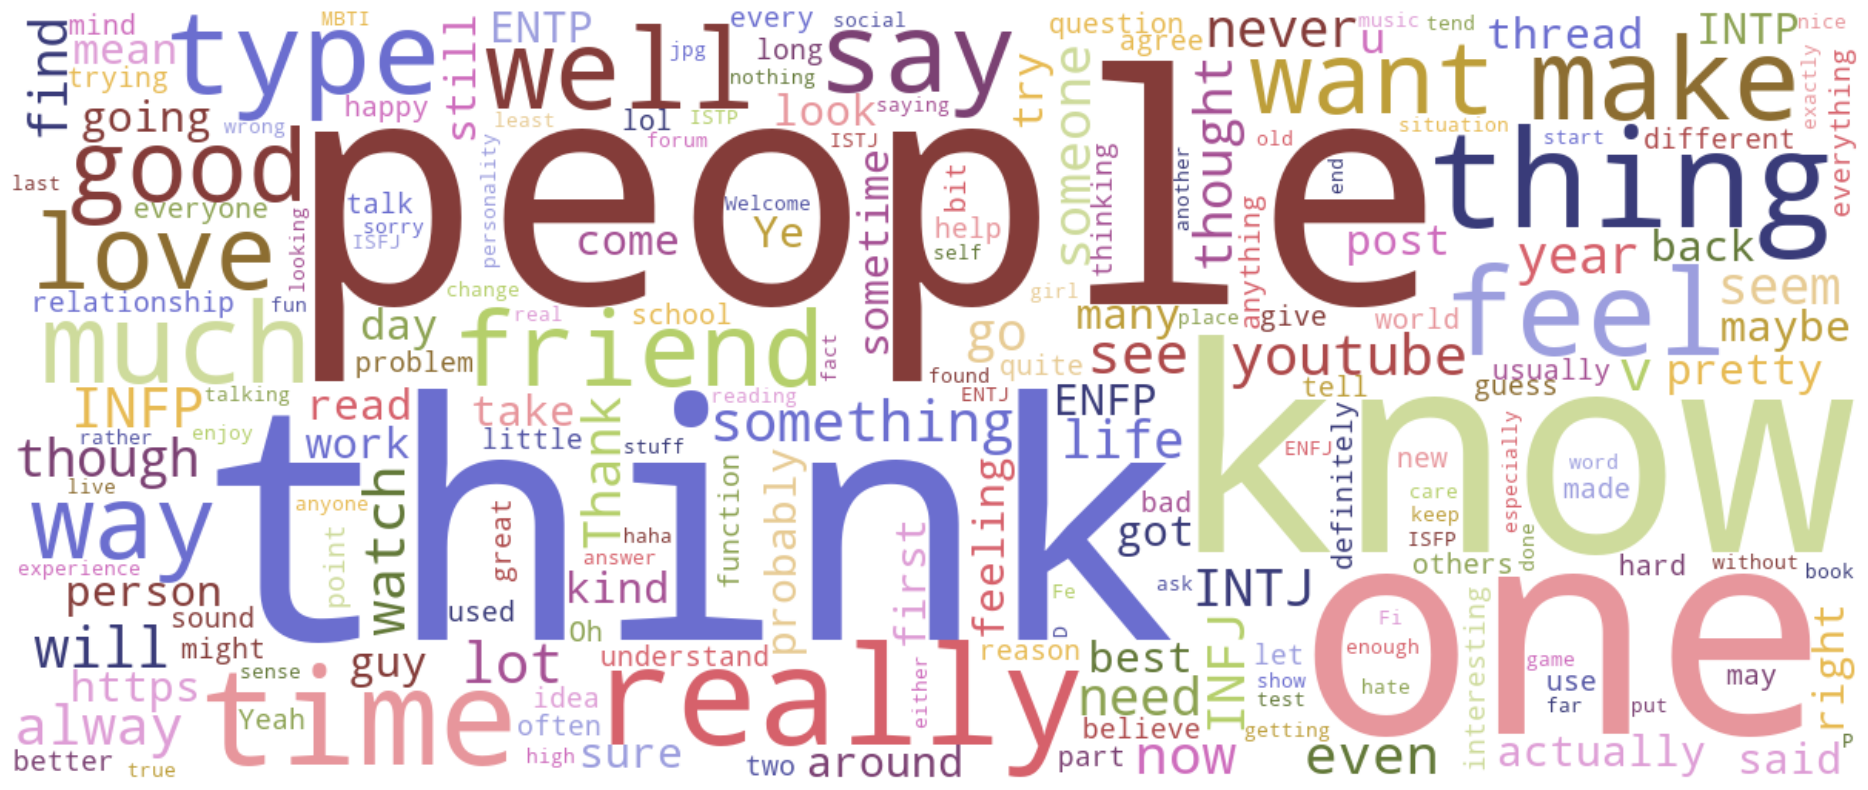

In [19]:
# Plotting the most common words with WordCloud.
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")


Turn the personality types into numbered categories, ranging from 0 to 15. These will serve as the output of the model when it is categorizing people.

In [20]:
#converting types to numbers from 0 to 15
types = np.unique(df.type.values)
def get_type_index(string):
    return list(types).index(string)
df['type_index'] = df['type'].apply(get_type_index)


Cleaning the text to get rid of hyperlinks (replace with the word link) , puncuation, personality types mentions, and anything else that's cluttering up the text. Specifically, the pipe (|) character seems like it separates different posts, but without spaces between them. First, replace the pipes with spaces so that the tokenizer won't parse those parts as one long word. 

In [21]:
types_lower = [t.lower() for t in types]
types = np.concatenate((types, types_lower))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP',
       'enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
       'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp'],
      dtype=object)

In [22]:
def clean_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    
    # Remove digits
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation and special characters except for apostrophe
    text = re.sub(r'[^a-zA-Z\s\']', '', text)
    
    # Convert to lowercase and split into words
    words = text.lower().split()
    
    # Remove words containing 'http', 'www', etc.
    words = [word for word in words if ('http' not in word)]
    
    # Remove words in the 'types' list
    words = [word for word in words if word not in types]
    
    # Filter out words with less than 2 characters
    words = [word for word in words if len(word) > 2]
    
    # Join the words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text
df['cleaned_text'] = df['posts'].apply(clean_text)

In [23]:
df.sample(10)

type                                              posts  \
2133  ENTP  'Concrete Random|||ENTP  Height: 6'0  Weight: ...   
5075  INFP  'Well, I mean, that's a whole other can of wor...   
4051  INTJ  'If a stranger or acquaintance says something ...   
3817  INFP  'Yes, I feel this once in awhile.  I know it i...   
8191  ENTP  'Dunno about other ENTPs but I tend to swing w...   
6209  INFP  'I my books grammar is overrated..I don't know...   
5430  INFP  'https://www.youtube.com/watch?v=LvWT-7l6vJU||...   
150   INTP  'Those responses makes sense. Forgot about the...   
3879  INTJ  'I maybe don't dislike it quite as much. But o...   
950   INFP  'Stare|||Just what I needed to hear, aha. Than...   

      words_per_comment  variance_of_word_counts  length_posts  type_index  \
2133              12.82               131.485434          4382           3   
5075              20.60               177.603600          6442           9   
4051              30.48                62.208400          9274          10   
3817              30.64                82.595600          8867           9   
8191              27.42               113.400000          8513           3   
6209              23.76               161.192400          7215           9   
5430              18.14               265.185600          6069           9   
150               27.42               141.160000          8638          11   
3879              34.54                23.889600          9632          10   
950               19.02               211.280000          5597           9   

                                           cleaned_text  
2133  'concrete random height weight lbs eyes blue h...  
5075  'well mean that's whole other can worms i'm ca...  
4051  'if stranger acquaintance says something that'...  
3817  'yes feel this once awhile know just strange s...  
8191  'dunno about other entps but tend swing wildly...  
6209  books grammar overratedi don't know the rules ...  
5430  most fanboyism for stuff scarh and acr exactly...  
150   'those responses makes sense forgot about the ...  
3879  maybe don't dislike quite much but one the rea...  
950   'stare just what needed hear aha thank you guy...

In [24]:
df.cleaned_text.values[0]

"and moments sportscenter not top ten plays pranks what has been the most lifechanging experience your life repeat for most today may the perc experience immerse you the last thing friend posted his facebook before committing suicide the next day rest peace hello sorry hear your distress it's only natural for relationship not perfection all the time every moment existence try figure the hard times times growth welcome and stuff game set match prozac wellbrutin least thirty minutes moving your legs and don't mean moving them while sitting your same desk chair weed moderation maybe try edibles healthier alternative basically come with three items you've determined that each type whichever types you want would more than likely use given each types' cognitive functions and whatnot when left all things moderation sims indeed video game and good one that note good one that somewhat subjective that not completely promoting the death any given sim dear what were your favorite video games growi

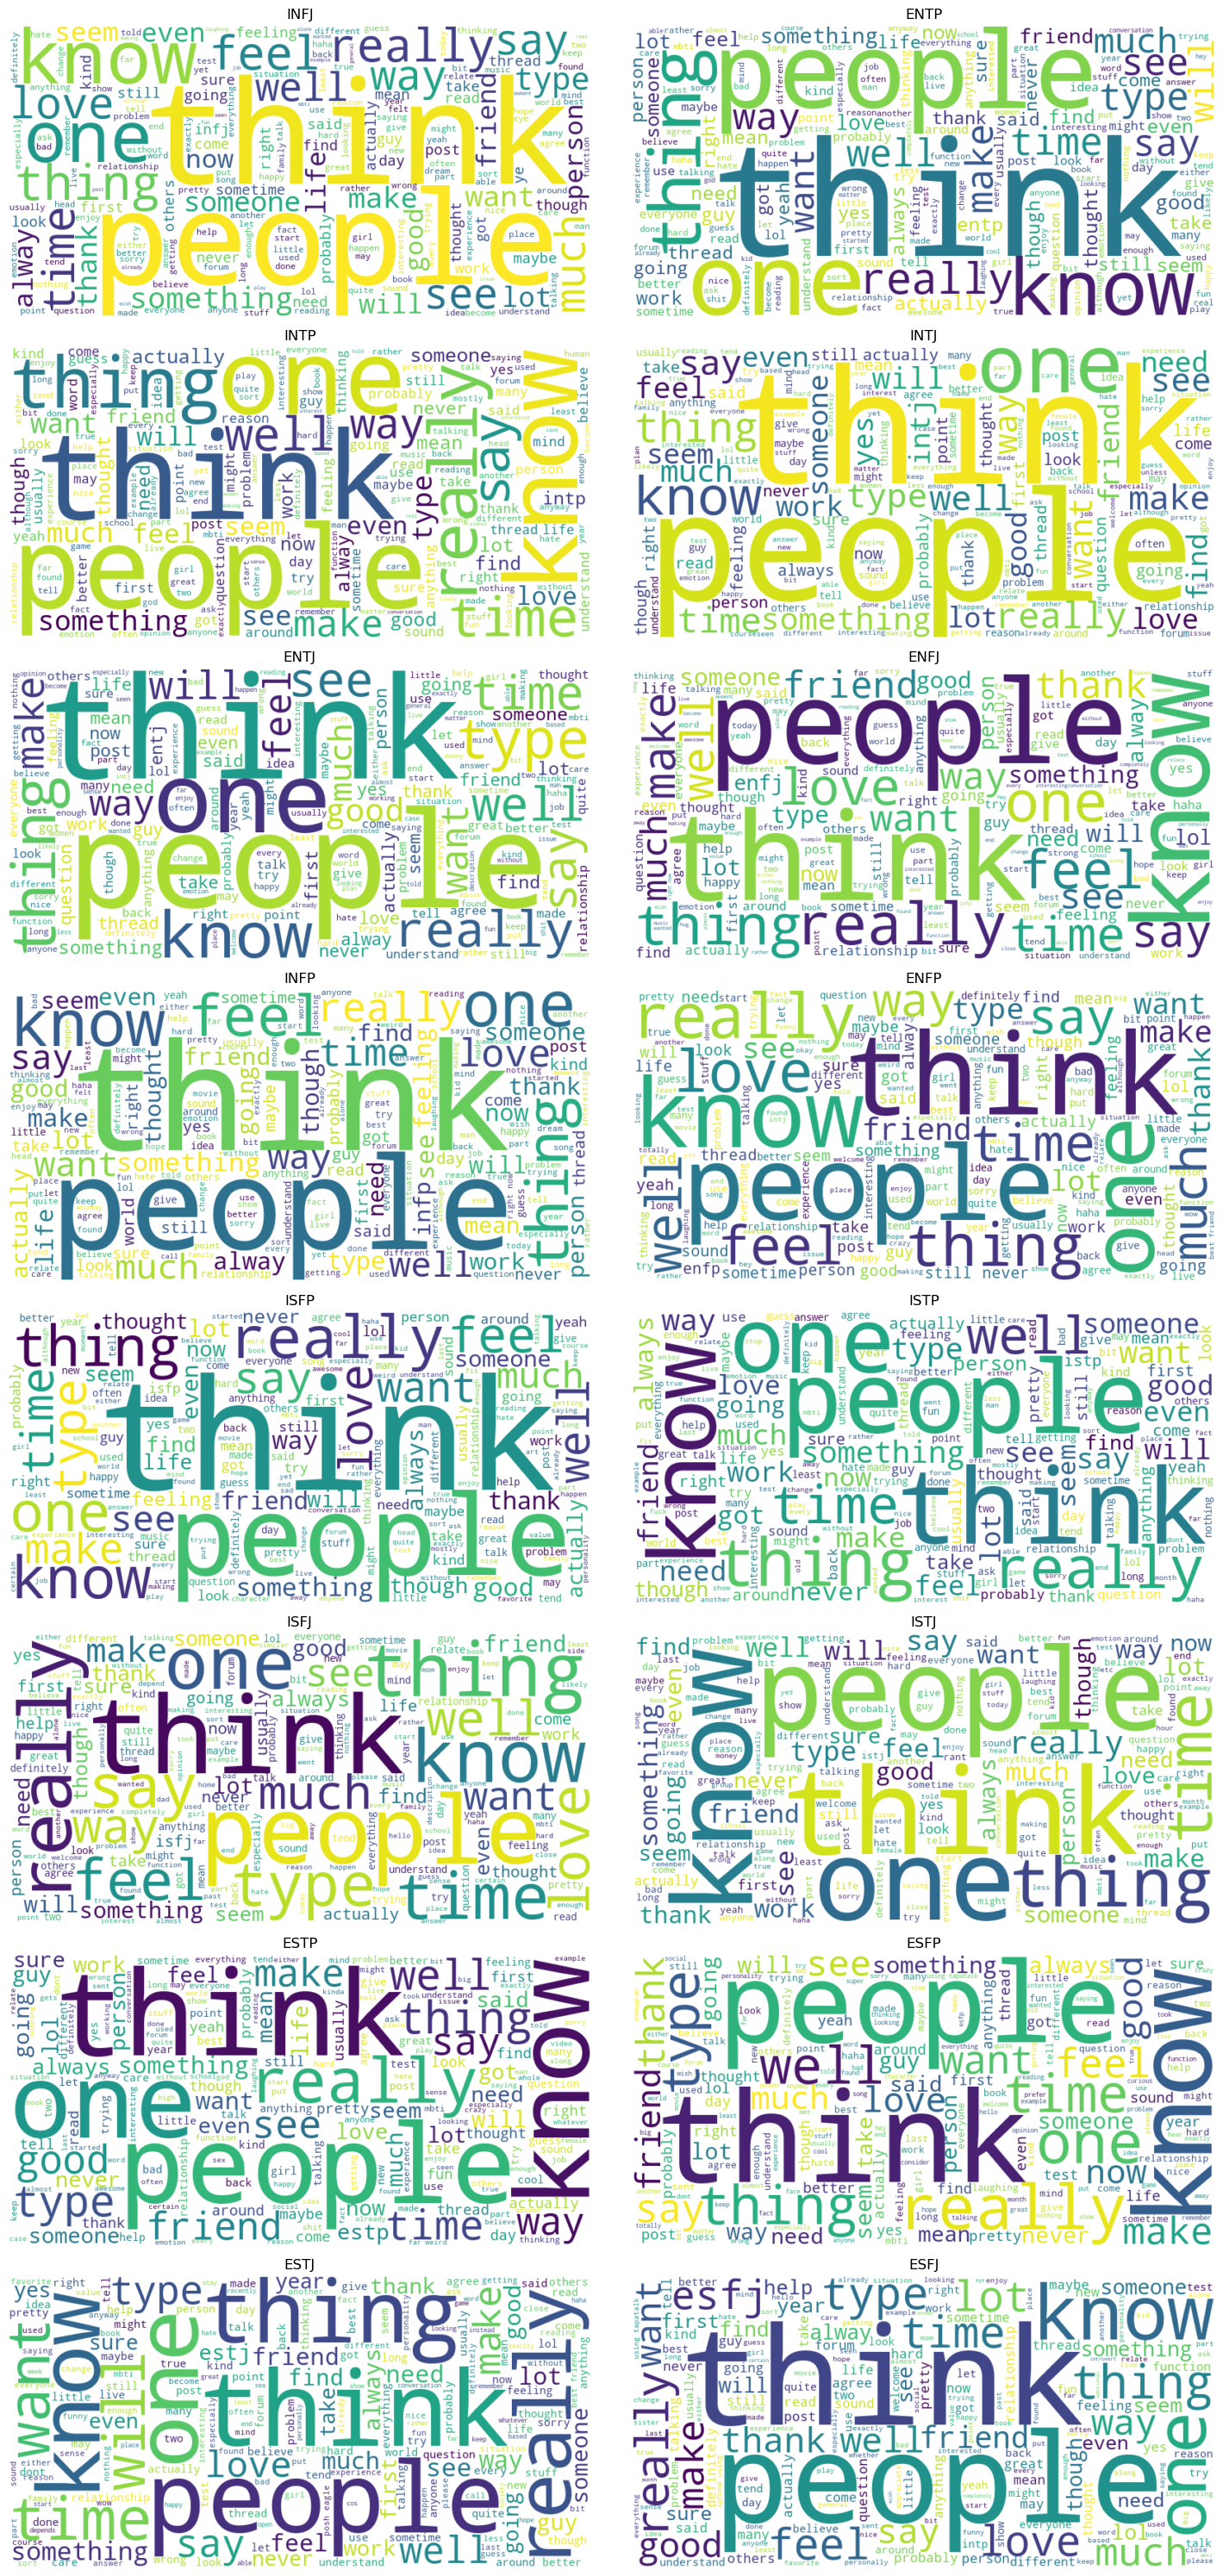

In [25]:
fig, axes = plt.subplots(8, 2, figsize=(15, 30))
axes = axes.flatten()

# Get unique types
unique_types = df['type'].unique()

# Generate word clouds for each unique type
for i, type_ in enumerate(unique_types):
    # Filter DataFrame for the current type
    filtered_df = df[df['type'] == type_]
    text = ' '.join(filtered_df['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(type_)
    ax.axis('off')

plt.tight_layout()
plt.show()

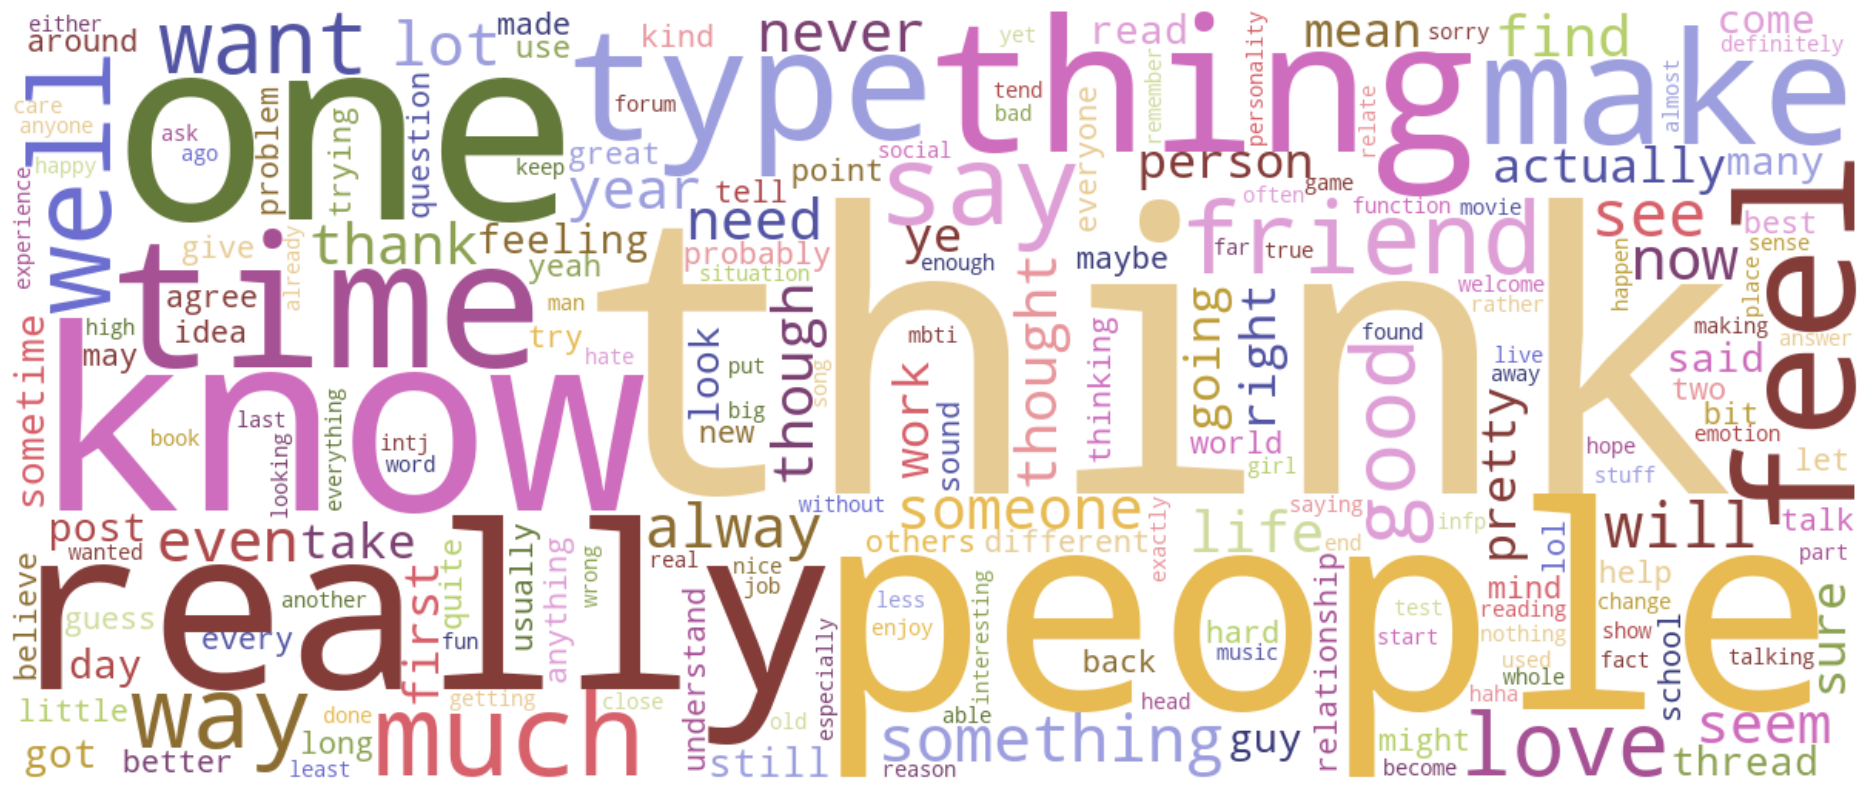

In [26]:
words = list(df["cleaned_text"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
# Plotting the most common words with WordCloud.
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")


In [27]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

# **Multinomial Logistic Regression Model**

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['type'], test_size=0.2, random_state=42)

# Vectorizing text data
vectorizer = TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=Lemmatizer())  
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train_vec, y_train)

# Predicting on test set
y_pred = model.predict(X_test_vec)

# Evaluating the model
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        41
        ENFP       0.59      0.41      0.48       125
        ENTJ       1.00      0.05      0.09        44
        ENTP       0.65      0.29      0.40       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.46      0.54      0.50       288
        INFP       0.48      0.81      0.60       370
        INTJ       0.45      0.54      0.50       193
        INTP       0.56      0.71      0.62       293
        ISFJ       0.00      0.00      0.00        45
        ISFP       0.00      0.00      0.00        53
        ISTJ       0.00      0.00      0.00        44
        ISTP       0.71      0.15      0.25        67

    accuracy                           0.50      1735
   macro avg       0.31   

# APPROACH 2

In [29]:
data = pd.read_csv("mbti_1.csv")
data


type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

In [30]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J })

In [31]:
data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

type                                              posts  IE  NS  TF  JP
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   1   1   0   1
1  ENTP  'I'm finding the lack of me in these posts ver...   0   1   1   0
2  INTP  'Good one  _____   https://www.youtube.com/wat...   1   1   1   0
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   1   1   1   1
4  ENTJ  'You're fired.|||That's another silly misconce...   0   1   1   1

In [32]:
print("Counting No. of posts in one class / Total no. of posts in the other class")
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Counting No. of posts in one class / Total no. of posts in the other class
Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) / Sensing (S):		 1197  /  7478
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434


We infer that there is unequal distribution even among each of the 4 axis in the entries of out dataset. i.e. out of IE:E is the majority, in NS:S is the majority. While TF and JP have realtively less differnce between them.

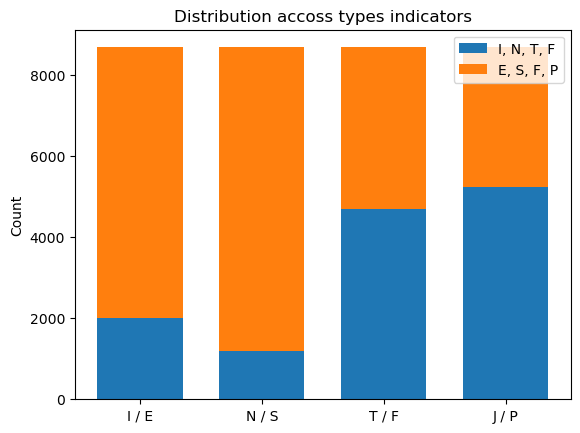

In [33]:
#Plotting the distribution of each personality type indicator
N = 4
bottom = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7           # or len(x) can also be used here

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

<Axes: title={'center': 'Features Correlation Heatmap'}>

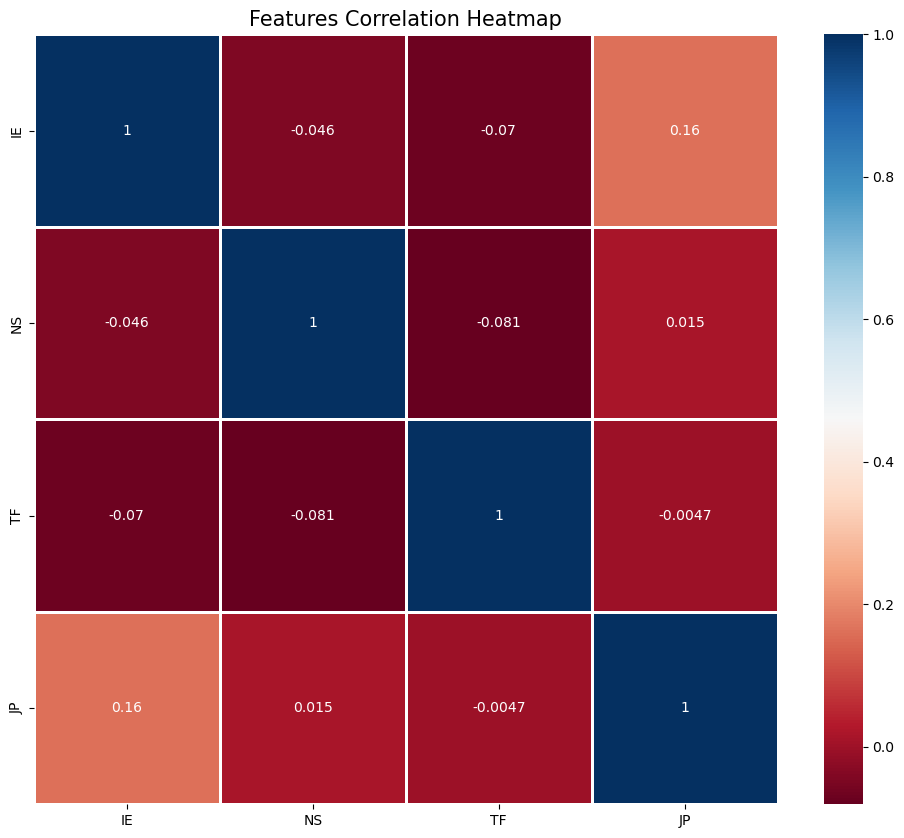

In [34]:
cmap = plt.cm.RdBu
corr = data[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Features Correlation Heatmap', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

In [35]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed 
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

# Binarizing each personality type feature

In [36]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


# Cleaning of data in the posts

In [37]:
def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_data = len(data)
  i=0
  
  for row in data.iterrows():

      #Remove and clean comments
      posts = row[1].posts

      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words 
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

In [38]:
list_posts, list_personality  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", data.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", data.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])

Example :

Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/up

In [39]:
nRow, nCol = list_personality.shape
print(f'No. of posts = {nRow}  and No. of Personalities = {nCol} ')

No. of posts = 8675  and No. of Personalities = 4 


## Feature Engineering
### Tf–idf for feature engineering evaluates how relevant/important a word is to a document in a collection of documnets or corpus. As we train individual classifiers here, it is very useful for scoring words in machine learning algorithms for Natural Language Processing.

### For our model we vectorize using count vectorizer and tf-idf vectorizer keeping the words appearing btw 10% to 70% of the posts.

In [40]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.7,
                             min_df=0.1) 
# the feature should be made of word n-gram 
# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()


# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'across'), (4, 'act'), (5, 'action'), (6, 'actually'), (7, 'add'), (8, 'advice'), (9, 'afraid')]

Using Tf-idf :
Now the dataset size is as below
(8675, 595)


Therefore we now have 595 features for each user post.

In [41]:
#counting top 10 words
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_10 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-10:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_10]

['feel',
 'type',
 'well',
 'say',
 'way',
 'friend',
 'want',
 'love',
 'good',
 'something']

Splitting into X and Y variable

Hence we split the features as :

X: User Posts in TF-IDF representation

Y: Personality type in Binarized MBTI form

In [42]:
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)", 
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


Let's see how the posts look in TF-IDF representation: (we have taken 1st post for demonstration)

In [43]:
print("X: 1st posts in tf-idf representation\n%s" % X_tfidf[0])

X: 1st posts in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08105478 0.07066064
 0.         0.         0.         0.         0.         0.
 0.         0.04516864 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05321691 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0871647  0.         0.         0.
 0.         0.         0.         0.05506308 0.0708757  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.16585935 0.         0.         0.09676192 0.
 0.         0.04970682 0.         0.         0.         0.
 0.07397056 0.         0.         0.         0.         0.
 0.       

Let's see how the posts look in Binarized MBTI personality indicator representation: (we have taken 1st post for demonstration)

In [44]:
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])

For MBTI personality type : INFJ
Y : Binarized MBTI 1st row: [0 0 0 0]


Therefore we have successfully converted the textual data into numerical form


# Training & Evaluating Models

In [45]:
# Posts in tf-idf representation
X = X_tfidf

In [46]:
accuracy_df = pd.DataFrame(columns=personality_type)

In [47]:
#Random Forest model for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    # Store accuracy value in DataFrame
    accuracy_df.loc['RandomForest', personality_type[l]] = accuracy
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.65%
NS: Intuition (N) / Sensing (S) Accuracy: 86.03%
FT: Feeling (F) / Thinking (T) Accuracy: 67.52%
JP: Judging (J) / Perceiving (P) Accuracy: 62.00%


In [48]:
#XGBoost model for MBTI dataset 
# Individually training each mbti personlity type
param = {}

param['n_estimators'] = 200 #100
param['max_depth'] = 2 #3
param['nthread'] = 8 #1
param['learning_rate'] = 0.2 #0.1
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    # Store accuracy value in DataFrame
    accuracy_df.loc['XGBoost', personality_type[l]] = accuracy
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report for %s:\n%s\n" % (personality_type[l], report))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.40%
Classification Report for IE: Introversion (I) / Extroversion (E):
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      2229
           1       0.43      0.06      0.11       634

    accuracy                           0.77      2863
   macro avg       0.61      0.52      0.49      2863
weighted avg       0.71      0.77      0.70      2863


NS: Intuition (N) / Sensing (S) Accuracy: 85.89%
Classification Report for NS: Intuition (N) / Sensing (S):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2463
           1       0.33      0.01      0.02       400

    accuracy                           0.86      2863
   macro avg       0.60      0.50      0.47      2863
weighted avg       0.79      0.86      0.80      2863


FT: Feeling (F) / Thinking (T) Accuracy: 69.79%
Classification Report for FT: Feeling (F) / Thinking (T):
      

In [49]:
# Stocastic Gradient Descent for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = SGDClassifier() 
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    # Store accuracy value in DataFrame
    accuracy_df.loc['StocasticGradientDescent', personality_type[l]] = accuracy
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.89%
NS: Intuition (N) / Sensing (S) Accuracy: 86.03%
FT: Feeling (F) / Thinking (T) Accuracy: 72.48%
JP: Judging (J) / Perceiving (P) Accuracy: 62.66%


In [50]:
# Logistic Regression for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression() 
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    # Store accuracy value in DataFrame
    accuracy_df.loc['LogisticRegression', personality_type[l]] = accuracy
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.54%
NS: Intuition (N) / Sensing (S) Accuracy: 86.06%
FT: Feeling (F) / Thinking (T) Accuracy: 72.44%
JP: Judging (J) / Perceiving (P) Accuracy: 64.51%


In [51]:
# SVM model for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = SVC(random_state = 1)
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    # Store accuracy value in DataFrame
    accuracy_df.loc['SVM', personality_type[l]] = accuracy
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.96%
NS: Intuition (N) / Sensing (S) Accuracy: 86.03%
FT: Feeling (F) / Thinking (T) Accuracy: 72.62%
JP: Judging (J) / Perceiving (P) Accuracy: 65.87%


In [52]:
# Initialize base models
models = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier()),
    ('sgd', SGDClassifier()),
    ('lr', LogisticRegression()),
    ('svm', SVC(kernel='linear', probability=True))
]

# Initialize Voting Classifier with the base models
ensemble_model = VotingClassifier(estimators=models, voting='hard')

# Individually training each MBTI personality type
for l in range(len(personality_type)):
    Y = list_personality[:, l]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # Fit ensemble model on training data
    ensemble_model.fit(X_train, y_train)

    # Make predictions for test data
    y_pred = ensemble_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy value in DataFrame
    accuracy_df.loc['Ensemble', personality_type[l]] = accuracy

    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

# Compute precision
    precision = precision_score(y_test, y_pred, average='macro')  # 'macro' computes precision for each label, and returns the average
    print("Precision:", precision)

# Compute recall
    recall = recall_score(y_test, y_pred, average='macro')  # 'macro' computes recall for each label, and returns the average
    print("Recall:", recall)

# Compute F1-score
    f1 = f1_score(y_test, y_pred, average='macro')  # 'macro' computes F1-score for each label, and returns the average
    print("F1-score:", f1)

# Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

IE: Introversion (I) / Extroversion (E) Accuracy: 77.40%
Accuracy: 0.7740132727907789
Precision: 0.5608805379336572
Recall: 0.5049844818728745
F1-score: 0.456694017319636
Confusion Matrix:
[[2202   27]
 [ 620   14]]
NS: Intuition (N) / Sensing (S) Accuracy: 86.03%
Accuracy: 0.86028641285365
Precision: 0.430143206426825
Recall: 0.5
F1-score: 0.46244836650394294
Confusion Matrix:
[[2463    0]
 [ 400    0]]
FT: Feeling (F) / Thinking (T) Accuracy: 72.72%
Accuracy: 0.7272092210967517
Precision: 0.7251768962599359
Recall: 0.7247451806275336
F1-score: 0.7249407657781503
Confusion Matrix:
[[1171  383]
 [ 398  911]]
JP: Judging (J) / Perceiving (P) Accuracy: 64.86%
Accuracy: 0.6486203283269298
Precision: 0.6271050662008479
Recall: 0.5927659033704733
F1-score: 0.5873765071287764
Confusion Matrix:
[[ 377  742]
 [ 264 1480]]


In [53]:
# Calculate mean of each row and store it in a new column 'model_mean'
accuracy_df['model_mean'] = accuracy_df.mean(axis=1).round(3)
accuracy_df

IE: Introversion (I) / Extroversion (E)  \
RandomForest                                            0.776458   
XGBoost                                                 0.774013   
StocasticGradientDescent                                0.778903   
LogisticRegression                                       0.77541   
SVM                                                     0.779602   
Ensemble                                                0.774013   

                         NS: Intuition (N) / Sensing (S)  \
RandomForest                                    0.860286   
XGBoost                                         0.858889   
StocasticGradientDescent                        0.860286   
LogisticRegression                              0.860636   
SVM                                             0.860286   
Ensemble                                        0.860286   

                         FT: Feeling (F) / Thinking (T)  \
RandomForest                                   0.675166   
XGBoost                                        0.697869   
StocasticGradientDescent                       0.724764   
LogisticRegression                             0.724415   
SVM                                            0.726161   
Ensemble                                       0.727209   

                         JP: Judging (J) / Perceiving (P)  model_mean  
RandomForest                                     0.619979       0.733  
XGBoost                                          0.639539       0.743  
StocasticGradientDescent                         0.626615       0.748  
LogisticRegression                               0.645127       0.751  
SVM                                               0.65875       0.756  
Ensemble                                          0.64862       0.753

In [54]:
accuracy_df.loc["XGBoost"]

IE: Introversion (I) / Extroversion (E)    0.774013
NS: Intuition (N) / Sensing (S)            0.858889
FT: Feeling (F) / Thinking (T)             0.697869
JP: Judging (J) / Perceiving (P)           0.639539
model_mean                                    0.743
Name: XGBoost, dtype: object

# Personality Prediction 1 - cover letter

In [55]:
my_posts  = """ Hi I am 21 years, currently, I am pursuing my graduate degree in computer science and management (Mba Tech CS ), It is a 5-year dual degree.... My CGPA to date is 3.8/4.0 . I have a passion for teaching since childhood. Math has always been the subject of my interest in school. Also, my mother has been one of my biggest inspirations for me. She started her career as a teacher and now has her own education trust with preschools schools in Rural and Urban areas. During the period of lockdown, I dwelled in the field of blogging and content creation on Instagram.  to spread love positivity kindness . I hope I am able deliver my best to the platform and my optimistic attitude helps in the growth that is expected. Thank you for the opportunity. """

# The type is just a dummy so that the data prep function can be reused
mydata = pd.DataFrame(data={'type': ['ESTP'], 'posts': [my_posts]})

my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [56]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [57]:
print("The result is: ", translate_back(result))

The result is:  INFJ


# Personality Prediction 2 - a poem

In [58]:
my_posts = """ They act like they care They tell me to share But when I carve the stories on my arm The doctor just calls it self harm I’m not asking for attention There’s a reason I have apprehensions I just need you to see What has become of me||| I know I’m going crazy But they think my thoughts are just hazy When in that chaos, in that confusion I’m crying out for help, to escape my delusions||| Mental health is a state of mind How does one keep that up when assistance is denied All my failed attempts to fight the blaze You treat it like its a passing phase||| Well stop, its not, because mental illness is real Understand that we’re all not made of steel Because when you brush these issues under the carpet You make it seem like its our mistake we’re not guarded||| Don’t you realise that its a problem that needs to be addressed Starting at home, in our nest Why do you keep your mouths shut about such things Instead of caring for those with broken wings||| What use is this social stigma When mental illness is not even such an enigma Look around and you’ll see the numbers of the affected hiding under the covers ||| This is an issue that needs to be discussed Not looked down upon with disgust Mental illness needs to be accepted So that people can be protected ||| Let me give you some direction People need affection The darkness must be escaped Only then the lost can be saved||| Bring in a change Something not very strange The new year is here Its time to eradicate fear||| Recognise the wrists under the knives To stop mental illness from taking more lives Let’s break the convention Start ‘suicide prevention’.||| Hoping the festival of lights drives the darkness of mental illness away"""
mydata = pd.DataFrame(data={'type': ['INFP'], 'posts': [my_posts]})
my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)
my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [59]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [60]:
print("The result is: ", translate_back(result))

The result is:  INTP


In [59]:
!pip install joblib

In [60]:
import joblib


In [61]:
joblib.dump(ensemble_model,'saved_model.pkl')

['saved_model.pkl']